## Step 1: Importing libraries

In [39]:
pip install xgboost

  Using cached xgboost-2.1.1-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.1-py3-none-win_amd64.whl (124.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data= pd.read_csv('Telco_Customer_Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# converting total charges as float
data["TotalCharges"]=pd.to_numeric(data.TotalCharges,errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
data['TotalCharges'].fillna(value=data['tenure']*data['MonthlyCharges'],inplace=True)

In [10]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

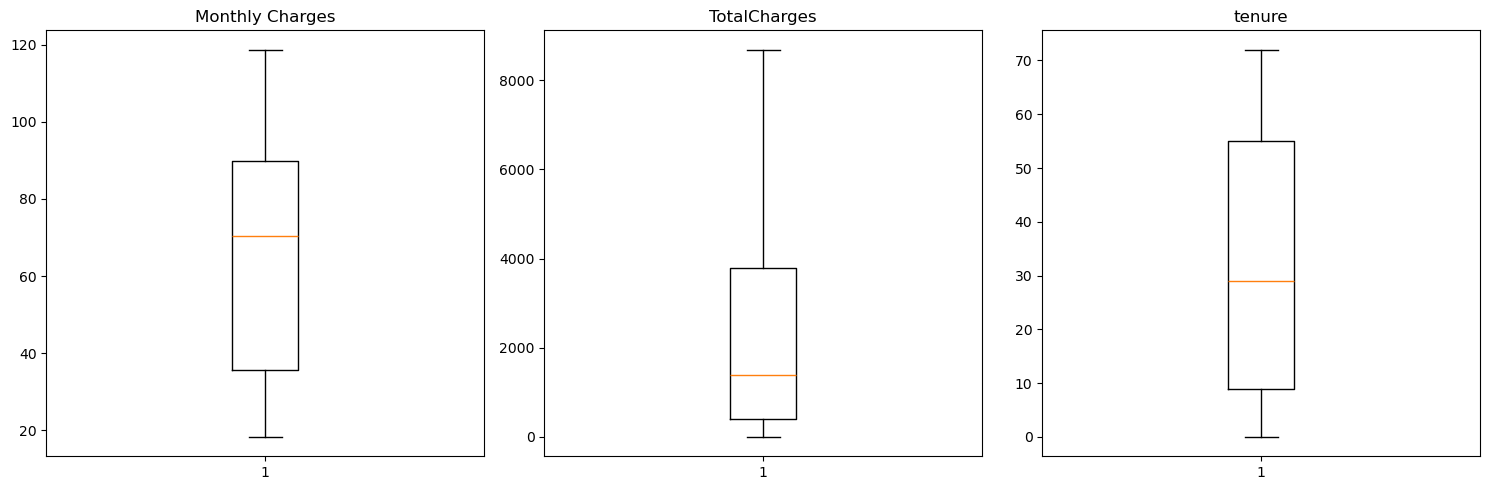

In [11]:
# ploting box plot to check outliers
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].boxplot(data['MonthlyCharges'])
axs[0].set_title('Monthly Charges')

axs[1].boxplot(data['TotalCharges'])
axs[1].set_title('TotalCharges')

axs[2].boxplot(data['tenure'])
axs[2].set_title('tenure')

plt.tight_layout()
plt.show()

## EDA

In [12]:
data.duplicated().sum()

0

In [13]:
#removing customerId
data.drop(columns=['customerID'],inplace=True)

In [14]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [16]:
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [17]:
data['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [18]:
column_yesno = ['gender', 'Partner', 'Dependents', 
       'PhoneService',  'OnlineSecurity', 'InternetService', 'PaymentMethod',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'Churn']

In [19]:
data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [20]:
data_changed=pd.get_dummies(data,columns=column_yesno,dtype=int)

In [21]:
data_changed.head()

,SeniorCitizen,tenure,MultipleLines,Contract,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,Churn_No,Churn_Yes
0,0,1,No phone service,Month-to-month,29.85,29.85,1,0,0,1,...,1,0,0,1,0,0,0,1,1,0
1,0,34,No,One year,56.95,1889.50,0,1,1,0,...,1,0,0,1,0,0,1,0,1,0
2,0,2,No,Month-to-month,53.85,108.15,0,1,1,0,...,1,0,0,1,0,0,0,1,0,1
3,0,45,No phone service,One year,42.30,1840.75,0,1,1,0,...,1,0,0,1,0,0,1,0,1,0
4,0,2,No,Month-to-month,70.70,151.65,1,0,1,0,...,1,0,0,1,0,0,0,1,0,1


In [22]:
from sklearn.preprocessing import OrdinalEncoder

MultipleLines_order = ['No phone service', 'No', 'Yes']
Contract_order = ['Month-to-month', 'One year', 'Two year']

# Create an OrdinalEncoder with defined categories for each column
encoder = OrdinalEncoder(categories=[MultipleLines_order, Contract_order])

# Apply ordinal encoding to the specified columns
data_changed[['MultipleLines', 'Contract']] = encoder.fit_transform(data_changed[['MultipleLines', 'Contract']])

# Display the transformed DataFrame
data_changed.head()


,SeniorCitizen,tenure,MultipleLines,Contract,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,Churn_No,Churn_Yes
0,0,1,0.0,0.0,29.85,29.85,1,0,0,1,...,1,0,0,1,0,0,0,1,1,0
1,0,34,1.0,1.0,56.95,1889.50,0,1,1,0,...,1,0,0,1,0,0,1,0,1,0
2,0,2,1.0,0.0,53.85,108.15,0,1,1,0,...,1,0,0,1,0,0,0,1,0,1
3,0,45,0.0,1.0,42.30,1840.75,0,1,1,0,...,1,0,0,1,0,0,1,0,1,0
4,0,2,1.0,0.0,70.70,151.65,1,0,1,0,...,1,0,0,1,0,0,0,1,0,1


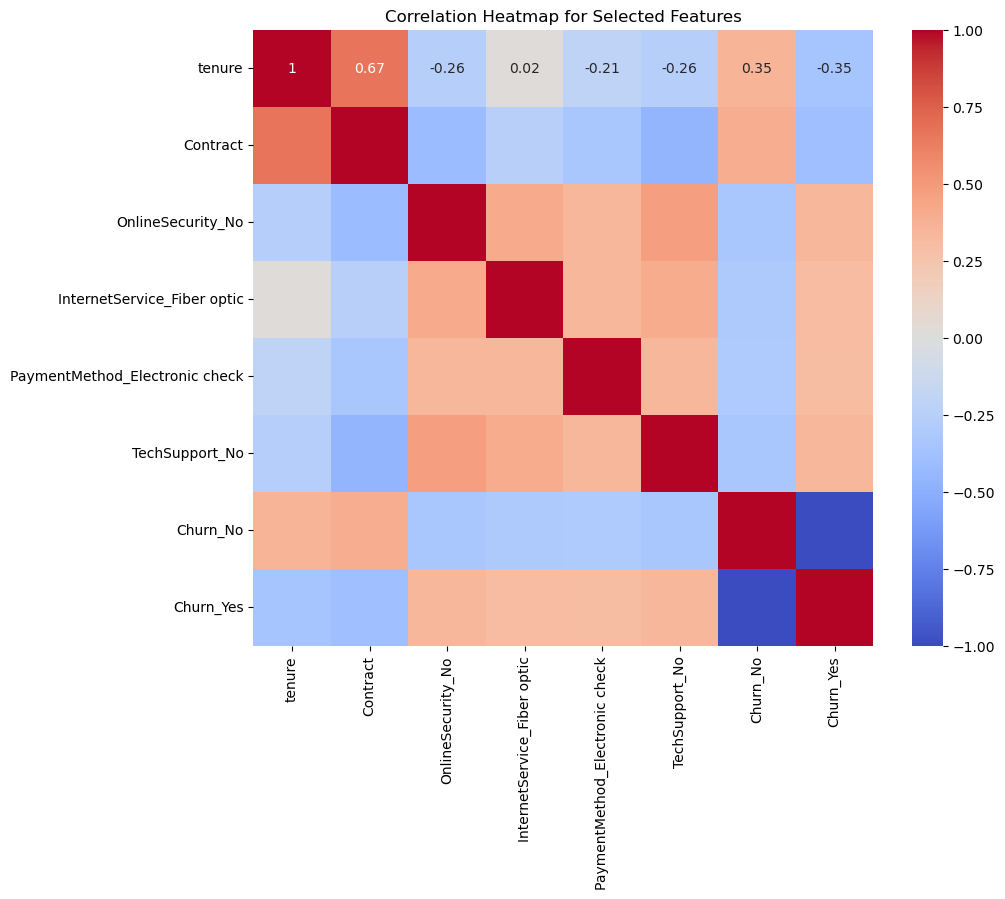

Selected columns and their correlations with Churn:
tenure                            0.352229
Contract                          0.396713
OnlineSecurity_No                -0.342637
InternetService_Fiber optic      -0.308020
PaymentMethod_Electronic check   -0.301919
TechSupport_No                   -0.337281
Churn_No                          1.000000
Churn_Yes                        -1.000000
Name: Churn_No, dtype: float64


In [23]:
#finding correlation 
corr = data_changed.corr()

# Extract the correlation values for the 'Churn' column
churn_correlation = corr['Churn_No']

# Select columns with correlation values between -1 and -0.3 or between 0.3 and 1
selected_columns = churn_correlation[(churn_correlation <= -0.3) | (churn_correlation >= 0.3)]

# Create a new DataFrame with the selected columns
selected_data = data_changed[selected_columns.index]

# Plotting the heatmap for the selected columns
plt.figure(figsize=(10, 8))
sns.heatmap(selected_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Selected Features')
plt.show()

# Display the selected columns and their correlations
print("Selected columns and their correlations with Churn:")
print(selected_columns)

In [24]:
selected_columns = selected_columns.index
selected_columns

Index(['tenure', 'Contract', 'OnlineSecurity_No',
       'InternetService_Fiber optic', 'PaymentMethod_Electronic check',
       'TechSupport_No', 'Churn_No', 'Churn_Yes'],
      dtype='object')

In [25]:
all_columns = data_changed.columns

remove_col = all_columns.difference(selected_columns)

data_changed.drop(columns= remove_col, axis= 1, inplace= True)

data_changed.head()

,tenure,Contract,OnlineSecurity_No,InternetService_Fiber optic,PaymentMethod_Electronic check,TechSupport_No,Churn_No,Churn_Yes
0,1,0.0,1,0,1,1,1,0
1,34,1.0,0,0,0,1,1,0
2,2,0.0,0,0,0,1,0,1
3,45,1.0,0,0,0,0,1,0
4,2,0.0,1,1,1,1,0,1


In [26]:
data_changed.drop(columns= 'Churn_No', axis= 1, inplace= True)

In [27]:
data_changed.head()

,tenure,Contract,OnlineSecurity_No,InternetService_Fiber optic,PaymentMethod_Electronic check,TechSupport_No,Churn_Yes
0,1,0.0,1,0,1,1,0
1,34,1.0,0,0,0,1,0
2,2,0.0,0,0,0,1,1
3,45,1.0,0,0,0,0,0
4,2,0.0,1,1,1,1,1


## Modeling

In [28]:
X = data_changed.drop('Churn_Yes', axis= 1)
y = data_changed['Churn_Yes']
X.head()

,tenure,Contract,OnlineSecurity_No,InternetService_Fiber optic,PaymentMethod_Electronic check,TechSupport_No
0,1,0.0,1,0,1,1
1,34,1.0,0,0,0,1
2,2,0.0,0,0,0,1
3,45,1.0,0,0,0,0
4,2,0.0,1,1,1,1


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 101)
X_train.shape, y_train.shape

((4930, 6), (4930,))

In [30]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)



LogisticRegression()

In [31]:

y_pred_LR = model_LR.predict(X_test)
accuracy_LR = accuracy_score(y_pred_LR, y_test)
accuracy_LR


0.8002839564600095

In [32]:
model_svc=SVC()
model_svc.fit(X_train,y_train)

SVC()

In [33]:
y_pred_svc = model_svc.predict(X_test)
accuracy_svc = accuracy_score(y_pred_svc, y_test)
accuracy_svc


0.7893989588263133

In [34]:
model_rfc=RandomForestClassifier()
model_rfc.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
y_pred_rfc = model_rfc.predict(X_test)
accuracy_rfc = accuracy_score(y_pred_svc, y_test)
accuracy_rfc

0.7893989588263133

In [41]:
model_xgbc=XGBClassifier()
model_xgbc.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [42]:
y_pred_xgbc = model_xgbc.predict(X_test)
accuracy_xgbc = accuracy_score(y_pred_xgbc, y_test)
accuracy_xgbc

0.779460482725982

In [36]:
from joblib import dump
dump(model_LR, "LR_model.joblib")

['LR_model.joblib']